5


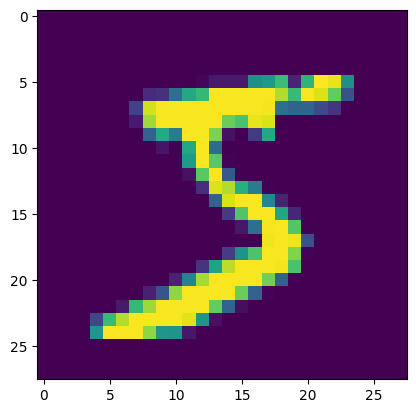

In [1]:
from dataset import MNIST
import matplotlib.pyplot as plt
ds=MNIST()
img,label=ds[0]
print(label)
plt.imshow(img.permute(1,2,0))
plt.show()


In [2]:
import torch
from dataset import MNIST
from vit import ViT
import torch.nn.functional as F
from torch.utils.data import DataLoader
import os


In [3]:

DEVICE='cuda' if torch.cuda.is_available() else 'cpu' 

dataset=MNIST()
model=ViT().to(DEVICE)

try:
    model.load_state_dict(torch.load('model.pth'))
except:
    pass

optimzer=torch.optim.Adam(model.parameters(),lr=1e-3)

EPOCH=50
BATCH_SIZE=64
dataloader=DataLoader(dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=10,persistent_workers=True)

iter_cnt=0
for epoch in range(EPOCH):
    for imgs,labels in dataloader:
        logits=model(imgs.to(DEVICE))
        loss=F.cross_entropy(logits,labels.to(DEVICE))
        optimzer.zero_grad()
        loss.backward()
        optimzer.step()
        if iter_cnt%1000==0:
            print('epoch:{} iter:{},loss:{}'.format(epoch,iter_cnt,loss))
            torch.save(model.state_dict(),'.model.pth')
            os.replace('.model.pth','model.pth')
        iter_cnt+=1


epoch:0 iter:0,loss:2.500194549560547
epoch:1 iter:1000,loss:0.9195393323898315
epoch:2 iter:2000,loss:0.813817024230957


KeyboardInterrupt: 

Correct: 5


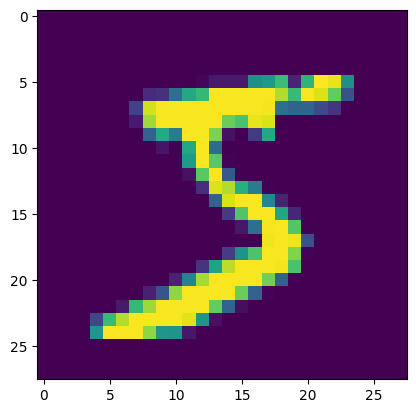

Prediction: 3


In [4]:
model.load_state_dict(torch.load('model.pth'))
model.eval()

img,label=dataset[0]
print('Correct:',label)
plt.imshow(img.permute(1,2,0))
plt.show()

logits=model(img.unsqueeze(0).to(DEVICE)) #[1, C, H, W]
print('Prediction:',logits.argmax(-1).item())
